In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw

In [ ]:
def _rstar_to_r(rs, M):
    rs = np.array(rs)
    return (2*M*(1 + lambertw(np.exp(rs/(2*M) - 1)))).real
    
def _r_to_rstar(r, M):
    r = np.array(r)
    if np.any(r <= 2*M):
        raise ValueError("All r must be > 2M")
    return r + 2*M*np.log(r/(2*M) - 1)

def Vpm(r, M, l, parity):
    if parity == 'axial':
        V = (1-2*M/r)*(l*(l+1)/r**2 - 6*M/r**3)
    elif parity == 'polar':
        n = 1/2*(l-1)*(l+2)
        num = 2*(1-2*M/r)*(
            9*M**3 +
            9*n*M**2*r + 
            3*n**2*M*r**2 + 
            n**2*(1 + n)*r**3
        )
        den = r**3*(3*M + n*r)**2
        V = num/den
    else:
        raise ValueError("parity needs to be either: axial or polar")
    return V

M = 1

rstar_array = np.linspace(-10, 4, 50000)
r1_array = _rstar_to_r(rstar_array, M)
r_array = np.linspace(_rstar_to_r(-10, M), 4, 50000)
V_test1 = Vpm(r_array, M, 2, 'axial')
V_test2 = Vpm(r1_array, M, 2, 'axial')

print(r1_array)
print()
print(r_array)

plt.figure()
plt.plot(r1_array, np.abs(V_test1 - V_test2))
plt.show()

plt.figure()
plt.plot(r_array, V_test1, label = '1')
plt.plot(r1_array, V_test2, label = '2')
plt.legend()
plt.show()

4.0 4.0
[2.00494526 2.00494595 2.00494664 ... 3.99972    3.99986    4.        ]

[2.00494526 2.00498516 2.00502507 ... 3.9999202  3.9999601  4.        ]


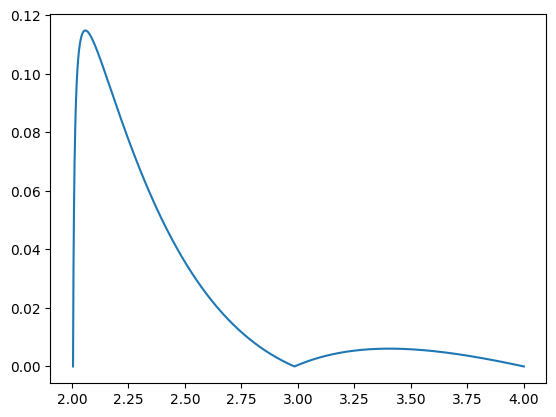

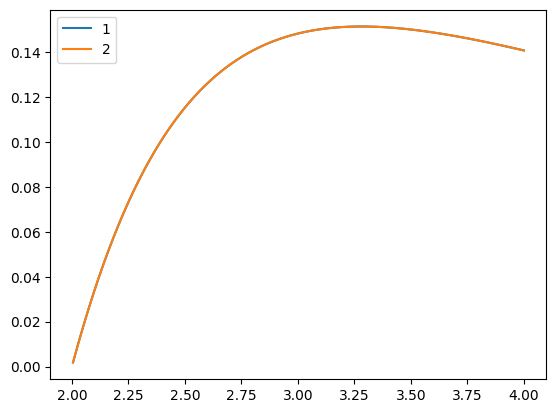

In [32]:
M = 1
print(_rstar_to_r(4, 1), _r_to_rstar(4, 1))

rstar_array = np.linspace(-10, 4, 50000)
r1_array = _rstar_to_r(rstar_array, M)
r_array = np.linspace(_rstar_to_r(-10, M), 4, 50000)
V_test1 = Vpm(r_array, M, 2, 'axial')
V_test2 = Vpm(r1_array, M, 2, 'axial')

print(r1_array)
print()
print(r_array)

plt.figure()
plt.plot(r1_array, np.abs(V_test1 - V_test2))
plt.show()

plt.figure()
plt.plot(r_array, V_test1, label = '1')
plt.plot(r1_array, V_test2, label = '2')
plt.legend()
plt.show()

In [35]:
r_arange = np.arange(_rstar_to_r(-10, M), 4, 0.1)
rstar_arange = _r_to_rstar(r_arange, M)
print(np.diff(r_arange))
print()
print(np.diff(rstar_arange))

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1]

[6.21001813 1.43860806 0.89477873 0.66723922 0.54139626 0.46137589
 0.40596436 0.36530824 0.33420036 0.30962779 0.28972545 0.27327669
 0.25945391 0.2476745  0.23751637 0.22866625 0.22088671 0.21399452
 0.20784602]
